# FEATURE SELECTION TECHNIQUES

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
  
* [Introduction](#0)
    * [What is Feature Selection?](#0.1)   
    * [Why Feature Selection?](#0.2) 
    * [Supervised Feature Selection Techniques](#0.3)
* [Filter Methods](#1)
   * [1- Basic methods](#1.1)
       * [Remove constant features](#1.1.1)
       * [Remove quasi-constant features](#1.1.2)
   * [2- Univariate feature selection](#1.2) 
        * [Select spacific number of features](#1.2.2) 
        * [Select spacific percentage of features](#1.2.2) 
        * [Select features that reduces hypothesis error](#1.2.3)
   * [3- Mutual Information](#1.3)
   * [4- Correlation Matrix with Heatmap](#1.4) 
   * [5- Variance Inflation Factor (VIF)](#1.5) 
   * [6- Principal Component Analysis (PCA)](#1.6) 
* [Wrapper Methods](#2)
   * [1- Forward Selection](#2.1) 
   * [2- Backward Elimination](#2.2) 
   * [3- Exhaustive Feature Selection](#2.3)
   * [4- Recursive Feature Elimination](#2.4)
   * [5- Recursive Feature Elimination with Cross-Validation](#2.5)
   
* [Embeded Methods](#3)
   * [1- LASSO ](#3.1) 
   * [2- Ridge](#3.2) 
   * [3- ElasticNet](#3.3)
   * [4- RandomForest](#3.4)   
   

---
<a id="0"><h1 style="text-align: center;">INTRODUCTION</h1></a> 

---
## <a id="0.1">What is Feature Selection?</a> 

**Feature selection** or **variable selection** is the process of selecting optimal number of features from a larger set of features. 

## <a id="0.2">Why Feature Selection?</a> 

Feature selection techniques are used for several reasons:
![](https://assets-global.website-files.com/5debb9b4f88fbc3f702d579e/60ecb081507f4559c84381f5_feature-selection-graphic.png)

- Improve data's compatibility with a learning model class.
- Shorter training times.
- Avoid the curse of dimensionality.
- Simplification of models to make them easier to interpret.
- Enhanced generalization by reducing overfitting.
- Improved accuracy


## <a id="0.3">Supervised Feature Selection Techniques</a> 
- Feature selection techniques are categorized into 3 typers. These are as follows:

![](https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149/figure/fig2/AS:830089595990017@1574920190654/The-main-feature-selection-methods-for-machine-learning.png)

---
<a id="1"><h1 style="text-align: center;">FILTER METHODS</h1></a> 

---

##### 1.1 [Basic methods](#1.1)  
##### 1.2 [Univariate feature selection](#1.2) 
##### 1.3 [Mutual Information](#1.3)  
##### 1.4 [Variance Inflation Factor (VIF)](#1.4) 

## <a id="1.1">[1.1] Basic methods</a>
Constant features are those that have the same value for all observations in the dataset. They don’t provide any discriminatory information for machine learning models.

- To identify constant features, we can use the [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) function from sklearn. 
- I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from [Kaggle](https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv).

**1.1.1 [Remove constant features](#1.1.1)**

**1.1.2 [Remove quasi-constant features](#1.1.2)**

In [3]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 6)
colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
# sns.set_context('talk')
sns.set(style="whitegrid")
sns.set_palette(palette= sns.color_palette("RdBu",20))

### Helper Function

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

AUCs=[]

def Test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc, accuracy, classification_report, confusion_matrix

### Read Data for binary classification problem

In [5]:
train_data = pd.read_csv('../input/santander-customer-satisfaction/train.csv', nrows=35000)
test_data = pd.read_csv('../input/santander-customer-satisfaction/test.csv', nrows=1500)
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
y_train = train_data['TARGET']
y_train.nunique()

2

In [350]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


### <a id="1.1.1">1.1.1 Remove constant features</a>

`sklearn.feature_selection.VarianceThreshold` removes all features which variance doesn’t meet some threshold. 

In [351]:
from sklearn.feature_selection import VarianceThreshold
selectvar = VarianceThreshold()
selectvar.fit(X_train)

VarianceThreshold()

In [352]:
print("No. of features before removing constatnt variables: ",X_train.shape[1])
print("No. of features after removing constatnt variables: ",selectvar.get_support().sum())

No. of features before removing constatnt variables:  370
No. of features after removing constatnt variables:  319


In [353]:
X_train[X_train.columns[~selectvar.get_support()]].describe()

,ind_var2_0,ind_var2,ind_var18_0,ind_var18,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var34_0,ind_var34,...,num_var2_0_ult1,num_var2_ult1,num_reemb_var13_hace3,num_reemb_var17_hace3,num_reemb_var33_hace3,num_trasp_var17_out_hace3,num_trasp_var33_out_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace3
count,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,...,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 😎**OBSERVATION:**
> There are 51 features such as `ind_var2_0`, `ind_var2`, `ind_var18_0`, and others have the same value (0.0) for all observations.

In [354]:
# columns name after remove the 51 feature 
X_train = X_train.iloc[:, selectvar.get_support(indices = True)]
X_train.shape

(35000, 319)

In [355]:
X_train = X_train.drop(columns='ID')
X_train.shape

(35000, 318)

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6095


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


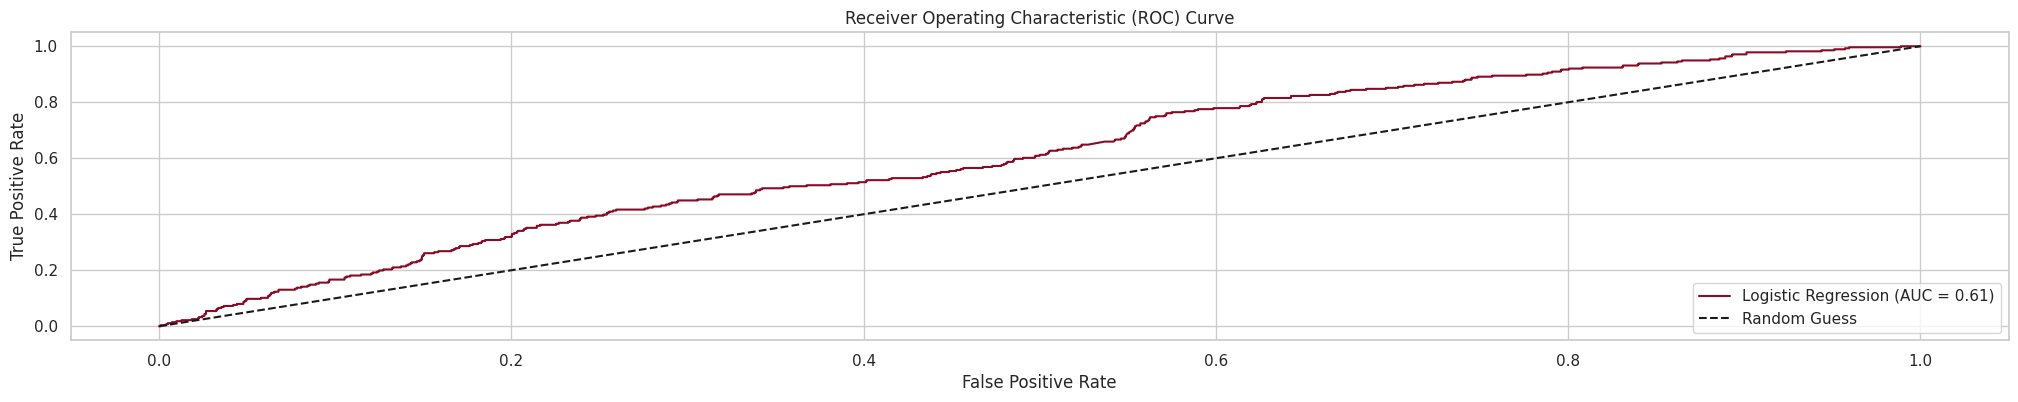

(0.6094969135004181,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [330]:
Test_model(X_train, y_train)

### <a id="1.1.2">1.1.2 Remove quasi-constant features</a>
Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. 

In [331]:
threshold=0.01
selectvar = VarianceThreshold(threshold)
selectvar.fit(X_train)

VarianceThreshold(threshold=0.01)

In [332]:
print("No. of features before removing quasi-constant variables: ",X_train.shape[1])
print("No. of features after removing quasi-constant variables: ",selectvar.get_support().sum())

No. of features before removing quasi-constant variables:  318
No. of features after removing quasi-constant variables:  262


In [333]:
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [334]:
X_train[X_train.columns[~selectvar.get_support()]].describe()

,ind_var1,ind_var6_0,ind_var6,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var14,ind_var17_0,ind_var17,ind_var19,...,num_reemb_var13_ult1,num_reemb_var17_ult1,num_reemb_var33_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.004029,0.000171,0.000057,0.010086,0.000029,0.000029,0.005429,0.001629,0.001371,0.004400,...,0.001371,0.000943,0.000086,0.000257,0.000171,0.000086,0.000257,0.000514,0.000086,0.000086
std,0.063344,0.013092,0.007559,0.099921,0.005345,0.005345,0.073480,0.040323,0.037008,0.066187,...,0.064129,0.073480,0.016036,0.035856,0.022678,0.016036,0.027774,0.045353,0.016036,0.016036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,9.000000,3.000000,6.000000,3.000000,3.000000,3.000000,6.000000,3.000000,3.000000


In [335]:
# columns name after remove the 51 feature 
X_train = X_train.iloc[:, selectvar.get_support(indices = True)]
X_train.shape

(35000, 262)

### Create Model with Variance Threshold Method

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6095


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


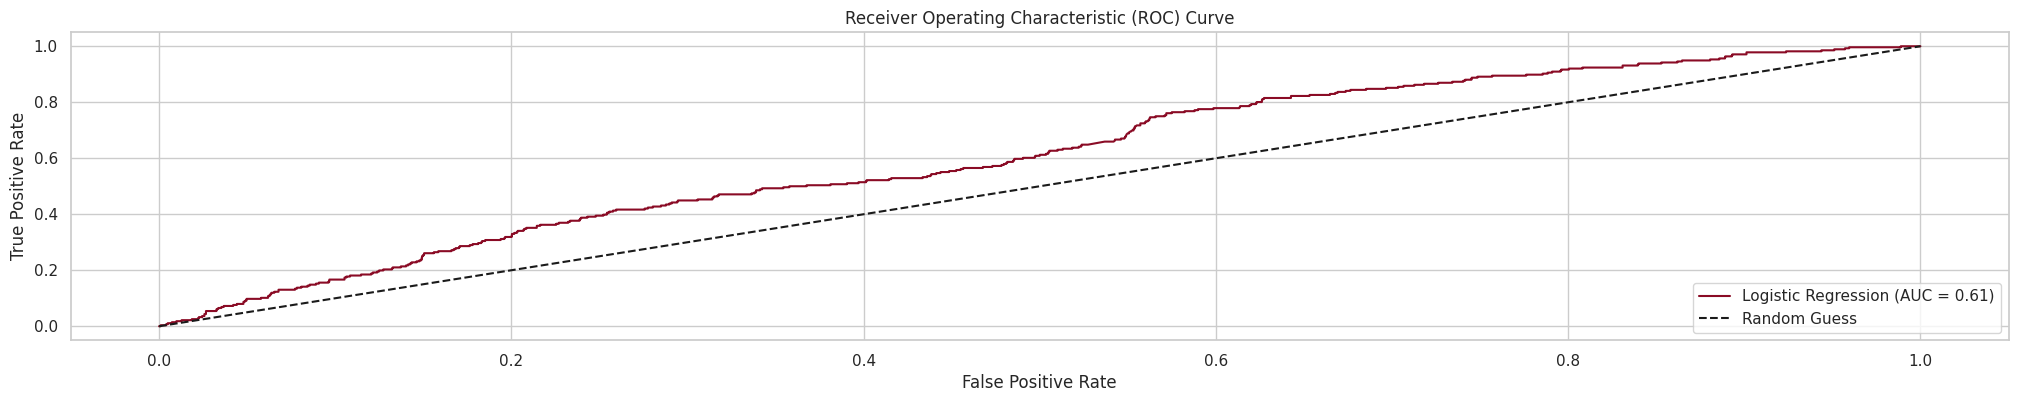

(0.6095001465656226,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [336]:
Test_model(X_train, y_train)

#### 😎**OBSERVATION:**
> By removing constant and quasi-constant features, we reduced the feature space from 370 to 263. 

## <a id="1.2">[1.2] Univariate selection methods</a>
Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA.

1.2.1 **[Select spacific number of features](#1.2.1)**:

Selects the top k features based on their statistical significance. Useful when you have a priori knowledge or constraints on the number of features to select.

1.2.2 **[Select spacific percentage of features](#1.2.2)**: 

Select features based on percentile of the highest scores.

1.2.3 **[Select features that reduces hypothesis error](#1.2.3)**:

   - Based on False Positive Rate
   - Based on False Discovery Rate
   - Family wise error
    
1.2.4 **[Mutual Information](#1.2.4)**

Select best based on mutual information between features and target. 

1.2.5 **[Flexible Approach](#1.2.5)** 

In a complex dataset with mixed data types, you might use custom scoring functions to prioritize features based on domain knowledge and model requirements.

### <a id='1.2.1'>1.2.1  Select spacific number of features</a>
Using `SelectKBest` from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) 

- **chi2**: Chi-squared stats of non-negative features for classification tasks.
- **f_classif**: ANOVA F-value between label/feature for classification tasks.
- **f_regression**: F-value between label/feature for regression tasks.

In [192]:
pd.set_option('display.max_rows', None)

#### Chi-squared stats of features

In [193]:
# from sklearn.feature_selection import SelectKBest, chi2

# KBest = 100
# selector = SelectKBest(score_func=chi2, k=KBest )
# selector.fit(X_train, y_train)

#### 😎**OBSERVATION:**
> The chi-squared test requires non-negative features. So, we will use another type.

#### ANOVA stats of features
This method is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In the context of feature selection, ANOVA F-values are used to measure the **discrimination power** of each feature.
- Discrimination power: In a classification task, the goal is to distinguish between different classes or categories of the target variable based on the features. 

- **Higher** the F-value -> **ore important** feature -> the feature values for each target class are not all equal -> the feature does **have a discrimination power** between the target classes.

- F-value is significantly **greater than 1**, this is evidence against the null hypothesis, and we conclude that the feature does **have a discrimination power**.

In [337]:
from sklearn.feature_selection import f_classif, SelectKBest
KBest = 100
selectkbest = SelectKBest(f_classif, k=KBest)
selectkbest.fit(X_train, y_train)

SelectKBest(k=100)

In [338]:
feature_names = selectkbest.feature_names_in_
scores = sorted(selectkbest.scores_, reverse=True)
pvalues= selectkbest.pvalues_

for i in range(len(scores)):
    print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] var3                               :  693.2 with p-value = 0.136
Feature [1  ] var15                              : 685.25 with p-value = 0.0
Feature [2  ] imp_ent_var16_ult1                 : 604.45 with p-value = 0.51
Feature [3  ] imp_op_var39_comer_ult1            :  567.0 with p-value = 0.023
Feature [4  ] imp_op_var39_comer_ult3            : 545.96 with p-value = 0.424
Feature [5  ] imp_op_var40_comer_ult1            : 533.29 with p-value = 0.706
Feature [6  ] imp_op_var40_comer_ult3            : 336.71 with p-value = 0.834
Feature [7  ] imp_op_var40_efect_ult1            : 324.69 with p-value = 0.001
Feature [8  ] imp_op_var40_efect_ult3            : 203.86 with p-value = 0.0
Feature [9  ] imp_op_var40_ult1                  : 188.24 with p-value = 0.612
Feature [10 ] imp_op_var41_comer_ult1            :  62.96 with p-value = 0.02
Feature [11 ] imp_op_var41_comer_ult3            :  61.09 with p-value = 0.351
Feature [12 ] imp_op_var41_efect_ult1            :  60.98 

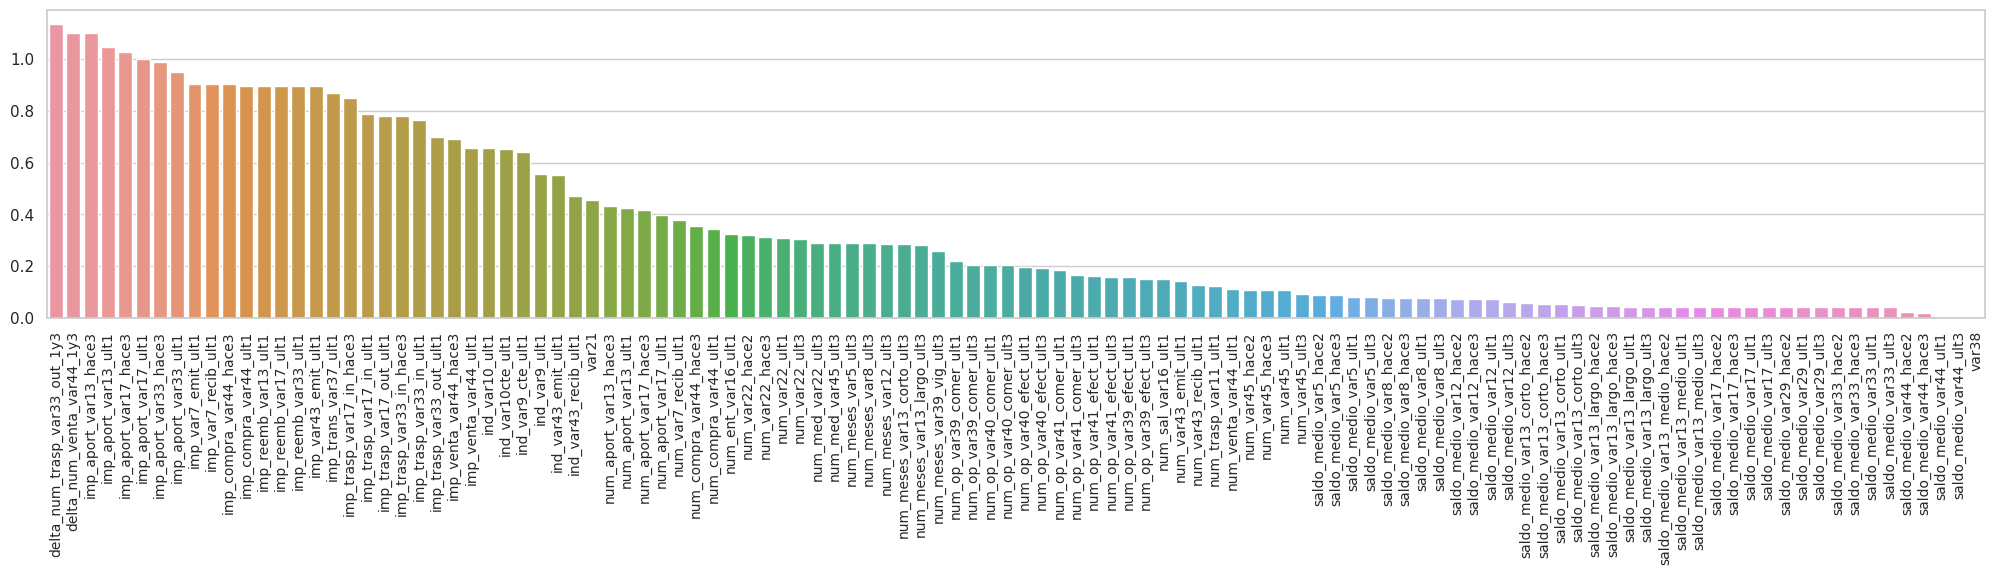

In [339]:
plt.rcParams["figure.figsize"] = (25,4)
sns.barplot(x=feature_names[150:], y=scores[150:])
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### 😎**OBSERVATION:**
> Features with F-values less than one might not have significant discriminative power in relation to the target variable compared to those with higher F-values.
> we should increase KBest to **156**

In [340]:
for i in range(len(scores)):
    if pvalues[i] > 0.05:
        print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] var3                               :  693.2 with p-value = 0.136
Feature [2  ] imp_ent_var16_ult1                 : 604.45 with p-value = 0.51
Feature [4  ] imp_op_var39_comer_ult3            : 545.96 with p-value = 0.424
Feature [5  ] imp_op_var40_comer_ult1            : 533.29 with p-value = 0.706
Feature [6  ] imp_op_var40_comer_ult3            : 336.71 with p-value = 0.834
Feature [9  ] imp_op_var40_ult1                  : 188.24 with p-value = 0.612
Feature [11 ] imp_op_var41_comer_ult3            :  61.09 with p-value = 0.351
Feature [18 ] imp_sal_var16_ult1                 :  52.16 with p-value = 0.742
Feature [19 ] ind_var1_0                         :  48.29 with p-value = 0.343
Feature [41 ] ind_var37_cte                      :  27.03 with p-value = 0.569
Feature [42 ] ind_var37_0                        :  26.24 with p-value = 0.69
Feature [43 ] ind_var37                          :  26.21 with p-value = 0.69
Feature [45 ] ind_var40_0                        :  24.

#### 😎**OBSERVATION:**
> Fot the above features the high p-value (>0.05) suggests that the differences in the means for different classes could be due to **random chance**. In other words, this feature might not be as important for the classification task as the F-value might suggest.

In [341]:
X_train = X_train.iloc[:, selectkbest.get_support(indices=True)]

### Create Model with select top 100 by ANOVA

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6169


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


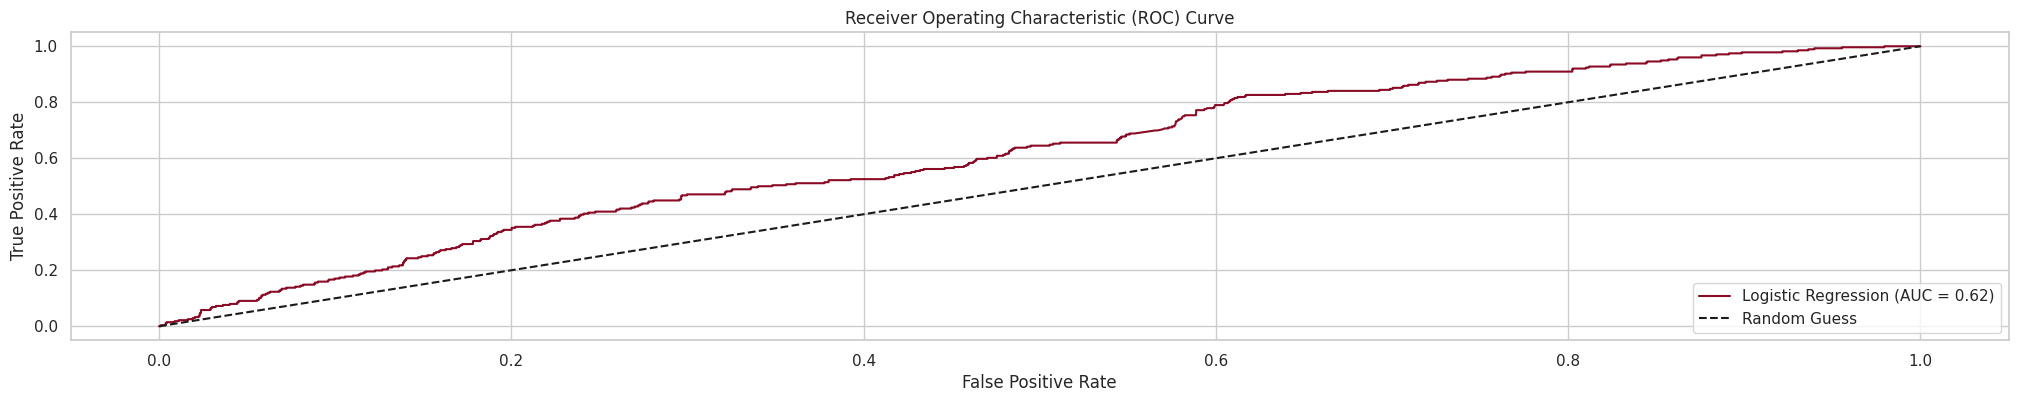

(0.6169426626662873,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [342]:
Test_model(X_train, y_train)

### <a id='1.2.2'>1.2.2 Select spacific percentage of features</a>
Using `SelectPercentile` from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)


In [385]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [386]:
from sklearn.feature_selection import SelectPercentile

per = 60 #Percent of features to keep.
selectper = SelectPercentile(f_classif, percentile=per)
selectper.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  44  45  57  58  59  60  72  73  81  85  86 110 111 132 133 134
 135 146 147 156 162 163 175 180 181 187 190 193 195 196 221 222 223 224
 235 237 239 245 249 262 263 304 306 308 316 320 328 350 358] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectPercentile(percentile=60)

In [387]:
selectper.get_support().sum()

222

In [388]:
X_train = X_train.iloc[:, selectper.get_support(indices=True)]

#### Create Model with SelectPercentile by ANOVA

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6055


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


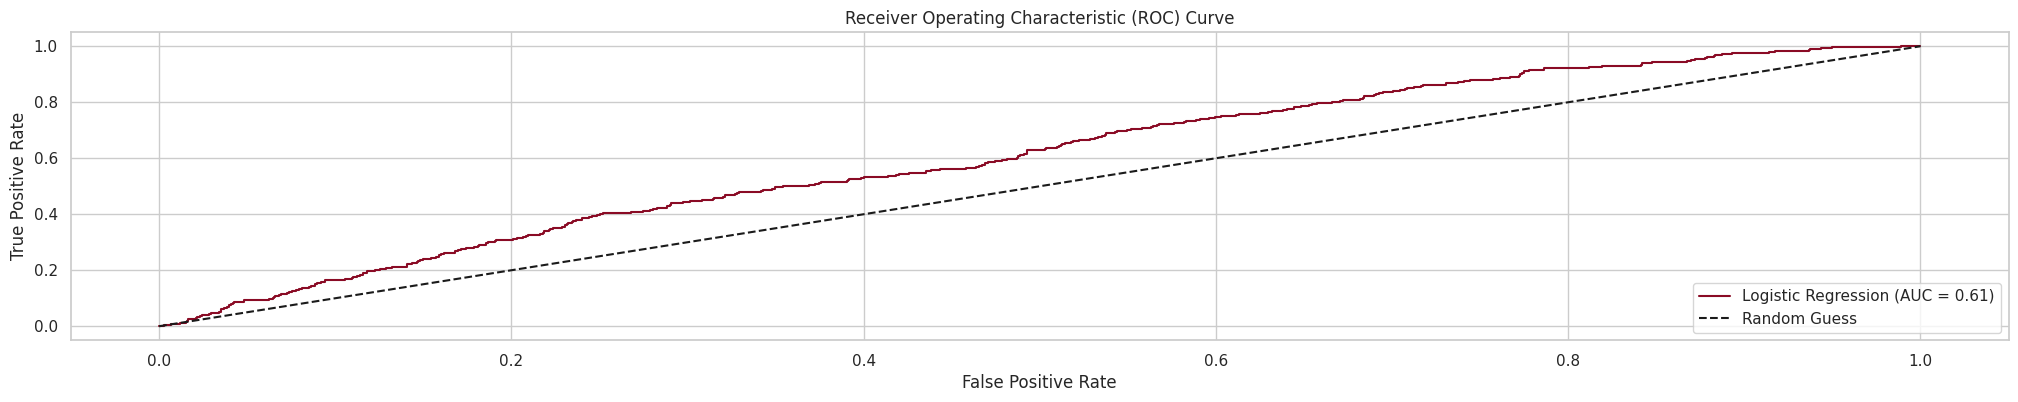

(0.605462586969454,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [389]:
Test_model(X_train, y_train)

### <a id='1.2.3'>1.2.3 Select features that reduces hypothesis error</a>

1.2.3 **[Select features that reduces hypothesis error](#1.2.3)**:

   a) **Based on False Positive Rate**: [SelectFpr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html) select features based on a false positive rate test. SelectFpr focuses on controlling the false positive rate, which is the probability of incorrectly rejecting a true null hypothesis (Type I error).
    
   - minimize the risk of selecting irrelevant features (كتير reject مش).
   - It operates by adjusting the threshold on the p-values of the features.
   - `SelectFpr` allows you to set the desired level of significance (alpha) directly.
   - **Example:** In a credit risk analysis, you could use`SelectFpr` to remove features with insignificant impact on default rates, thereby reducing the risk of approving high-risk applicants.


   b) **Based on False Discovery Rate**:[SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html) is the same as `SelectFpr` but by controlling the  the proportion of falsely rejected null hypotheses.

   - Unlike `SelectFpr`, `SelectFdr` does not require you to specify the significance level (alpha) directly. Instead, it estimates the threshold based on the desired false discovery rate.


   c) **Family wise error:** [SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html) select features based on family-wise error rate. Applicable when you're concerned about overall error rates in multiple hypothesis tests.

#### Based on False Positive Rate

In [390]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [391]:
from sklearn.feature_selection import SelectFpr
selectfpr = SelectFpr(f_classif, alpha=0.05)
selectfpr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  44  45  57  58  59  60  72  73  81  85  86 110 111 132 133 134
 135 146 147 156 162 163 175 180 181 187 190 193 195 196 221 222 223 224
 235 237 239 245 249 262 263 304 306 308 316 320 328 350 358] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectFpr()

In [392]:
selectfpr.get_support().sum()

128

In [382]:
feature_names = selectfpr.feature_names_in_
scores = sorted(selectfpr.scores_, reverse=True)
pvalues= selectfpr.pvalues_

for i in range(len(scores)):
    if pvalues[i] > 0.05: 
        print(f"Feature [{i:<3}] {feature_names[i]:<35}: {round(scores[i], 2):>6} with p-value = {round(pvalues[i], 3)}")

Feature [0  ] ID                                 : 336.71 with p-value = 0.171
Feature [1  ] var3                               :    nan with p-value = 0.136
Feature [3  ] imp_ent_var16_ult1                 : 545.96 with p-value = 0.51
Feature [5  ] imp_op_var39_comer_ult3            :  60.98 with p-value = 0.424
Feature [6  ] imp_op_var40_comer_ult1            :  58.95 with p-value = 0.706
Feature [7  ] imp_op_var40_comer_ult3            :  55.93 with p-value = 0.834
Feature [10 ] imp_op_var40_ult1                  :  42.04 with p-value = 0.612
Feature [12 ] imp_op_var41_comer_ult3            :  37.93 with p-value = 0.351
Feature [19 ] imp_sal_var16_ult1                 :  18.11 with p-value = 0.742
Feature [20 ] ind_var1_0                         :   16.8 with p-value = 0.343
Feature [26 ] ind_var6_0                         :   5.19 with p-value = 0.62
Feature [27 ] ind_var6                           :   4.21 with p-value = 0.774
Feature [37 ] ind_var13_medio_0                  :   0

In [393]:
X_train = X_train.iloc[:, selectfpr.get_support(indices=True)]

#### Create Model with SelectFpr by ANOVA

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6150


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


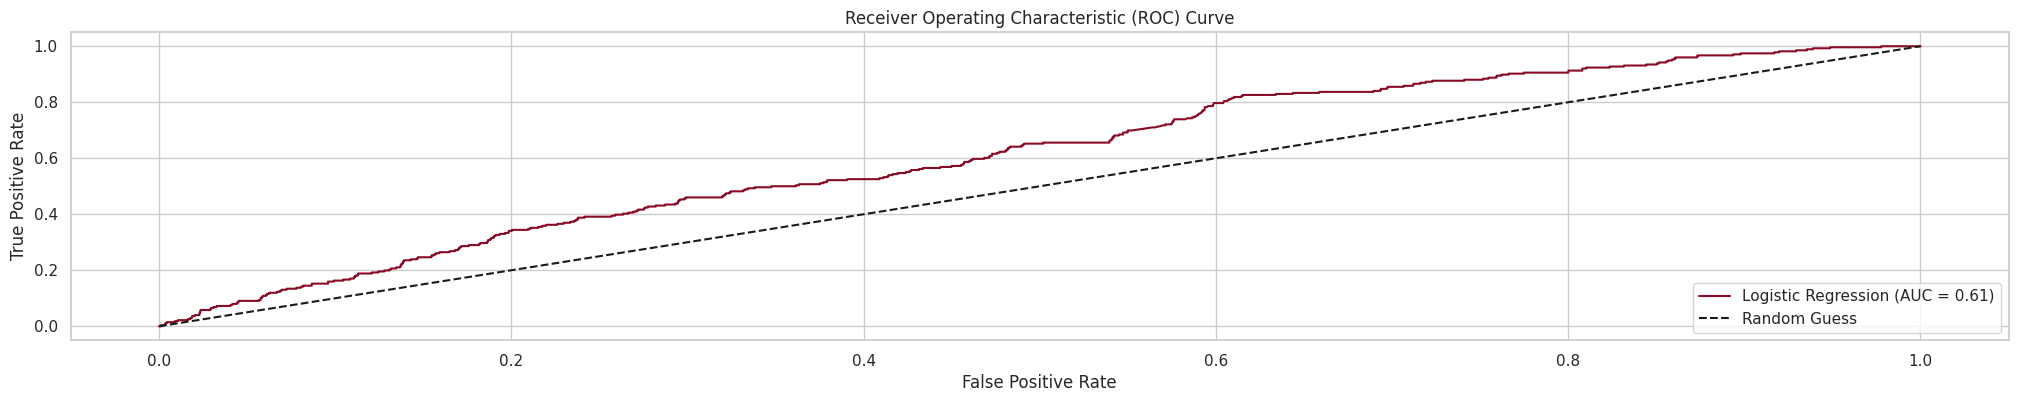

(0.6149527110329427,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [395]:
Test_model(X_train, y_train)

#### Based on False Discovery Rate

In [396]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [397]:
from sklearn.feature_selection import SelectFdr
selectfdr = SelectFdr(f_classif, alpha=0.05)
selectfdr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  44  45  57  58  59  60  72  73  81  85  86 110 111 132 133 134
 135 146 147 156 162 163 175 180 181 187 190 193 195 196 221 222 223 224
 235 237 239 245 249 262 263 304 306 308 316 320 328 350 358] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectFdr()

In [398]:
selectfdr.get_support().sum()

102

In [399]:
X_train = X_train.iloc[:, selectfdr.get_support(indices=True)]

#### Create Model with SelectFdr by ANOVA

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6160


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


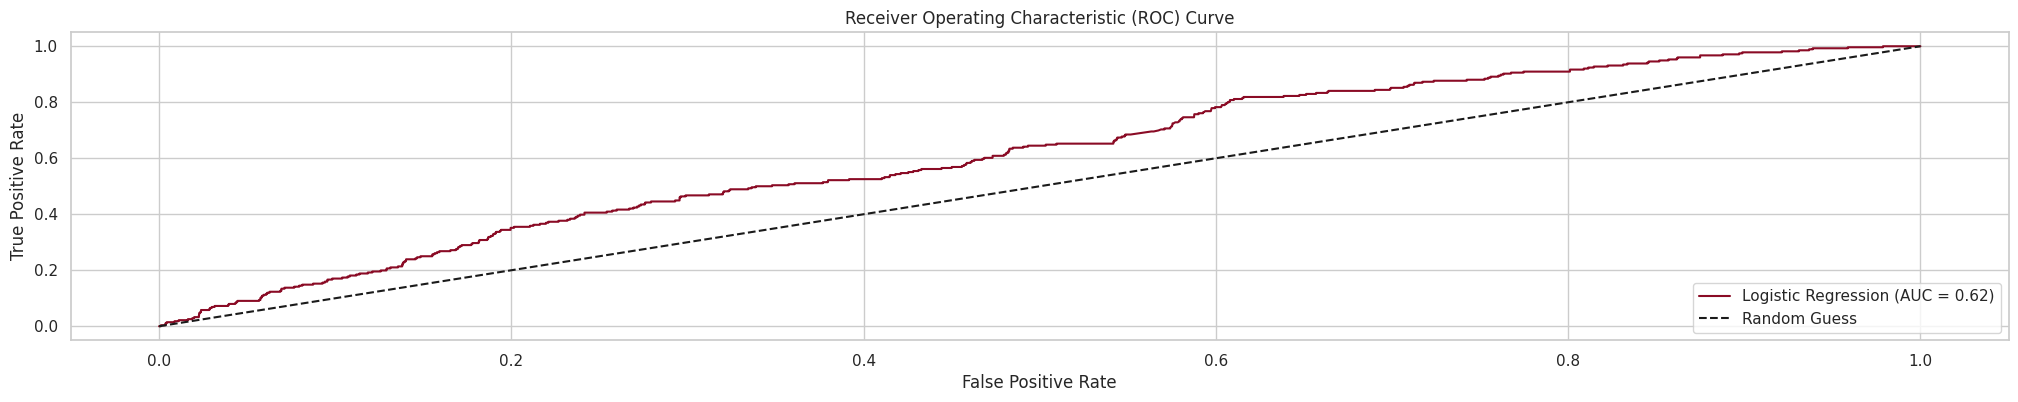

(0.6160471036046522,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [400]:
Test_model(X_train, y_train)

#### Family wise errors

In [401]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [402]:
from sklearn.feature_selection import SelectFwe

selectfwe = SelectFwe(f_classif, alpha=0.05)
selectfwe.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  44  45  57  58  59  60  72  73  81  85  86 110 111 132 133 134
 135 146 147 156 162 163 175 180 181 187 190 193 195 196 221 222 223 224
 235 237 239 245 249 262 263 304 306 308 316 320 328 350 358] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectFwe()

In [403]:
selectfwe.get_support().sum()

76

In [405]:
X_train = X_train.iloc[:,selectfwe.get_support(indices=True)]
X_train.shape

IndexError: positional indexers are out-of-bounds

### Create Model with SelectFwe Method

Accuracy: 0.9604

Confusion Matrix:
[[6723    1]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.3836


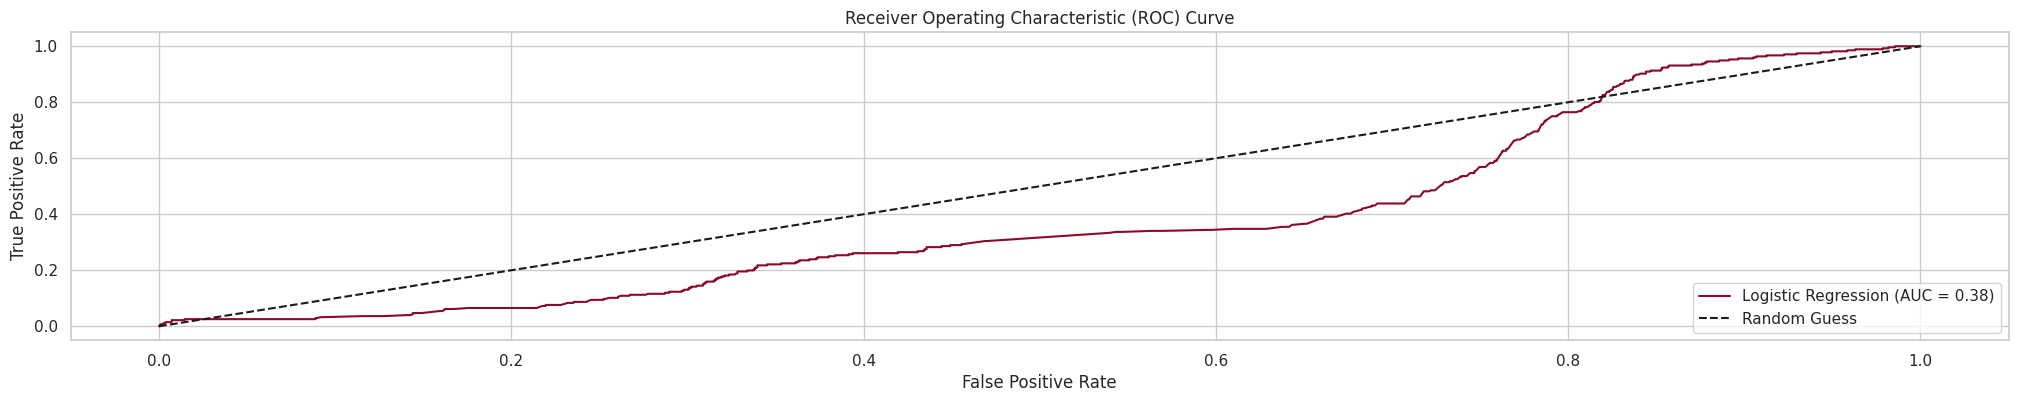

(0.38357166412332205,
 0.9604285714285714,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [406]:
Test_model(X_train, y_train)

### <a id='1.2.5'>1.2.5 Flexible Approach</a>
In a complex dataset with mixed data types, you might use [GenericUnivariateSelection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html) with custom scoring functions to prioritize features based on domain knowledge and model requirements.

   - **Example:** In a high-dimensional dataset, you could use it to experiment with different feature selection strategies such as combining chi-squared statistics with mutual information to capture both linear and non-linear relationships.
   
##### **GenericUnivariateSelection**:   
- `score_func`: callable, default=`f_classif`.
- `mode`: {‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}
- `param`: “all”, float, or int, default=`1e-5`} Parameter of the corresponding mode.



In [168]:
from sklearn.feature_selection import GenericUnivariateSelect

selectgen = GenericUnivariateSelect(score_func=f_classif, mode='fwe', param=0.05)
selectgen.fit(X_train, y_train)

GenericUnivariateSelect(mode='fwe', param=0.05)

In [169]:
selectgen.get_support().sum()

79

## <a id='1.3'>[1.3] Information Gain </a>
Information gain or [mutual information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.
- For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. 
- Mutual information (MI) is a non-negative value, which measures the dependency between the variables.
- Used in both classification and regression tasks.

- Use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) and [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) from scikit-learn with the following parameters to apply this technique.

    - **mutual_info_classif**: Mutual information for for classification tasks.
    - **mutual_info_regression**: Mutual information for regression tasks.

In [407]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

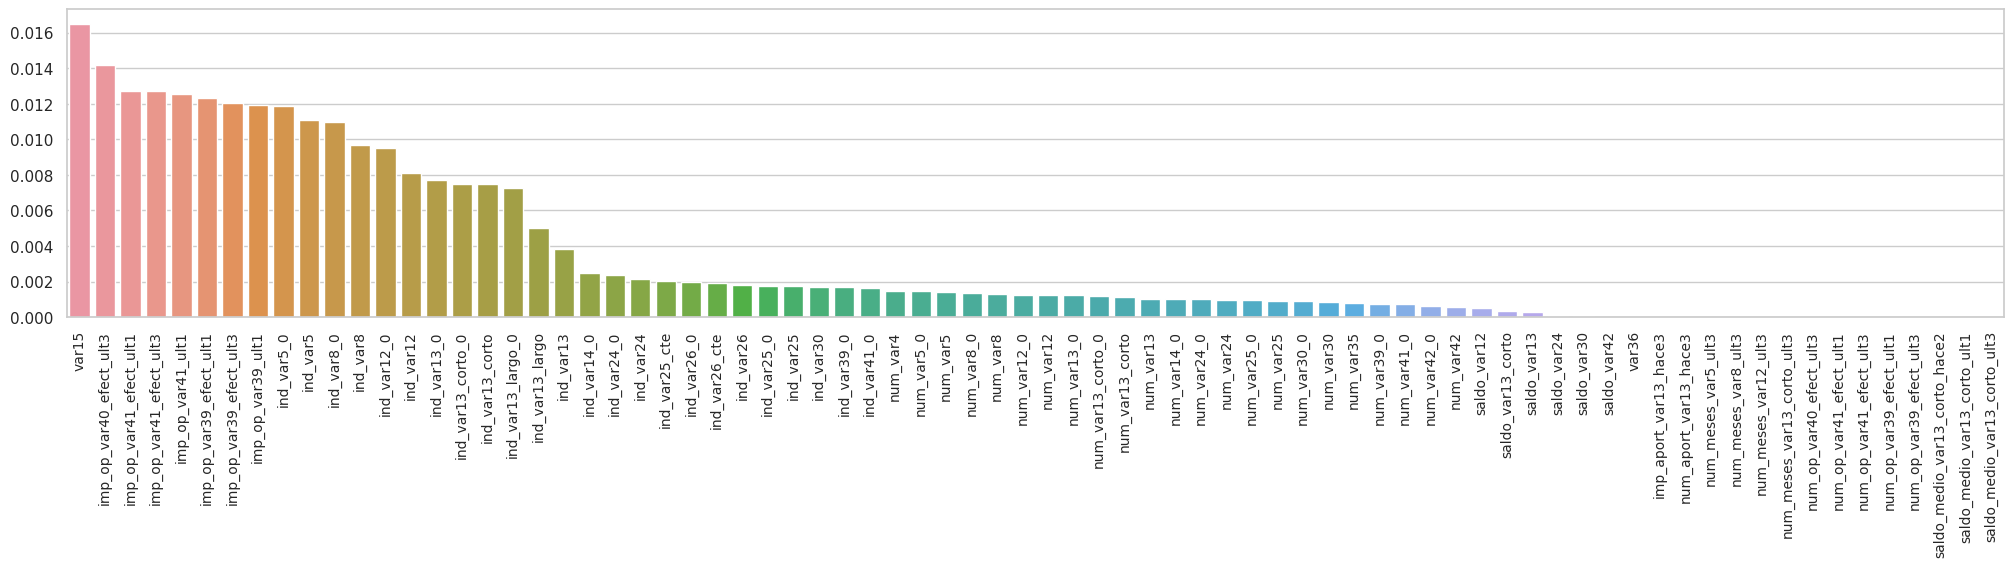

In [408]:
from sklearn.feature_selection import mutual_info_classif
MIs = mutual_info_classif(trans_X_train, y_train)

plt.rcParams["figure.figsize"] = (25,4)
sns.barplot(x=trans_X_train.columns,y=sorted(MIs, reverse=True))
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [409]:
selectMI = SelectPercentile(mutual_info_classif, percentile=60)
selectMI.fit(trans_X_train, y_train)

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_classif at 0x7879224c4f70>)

In [411]:
selectMI.get_support().sum()

45

In [412]:
X_train = X_train.iloc[:,selectMI.get_support(indices=True)]
X_train.shape

(35000, 45)

#### Create Model with Mutual Information

Accuracy: 0.9603

Confusion Matrix:
[[6722    2]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.5122


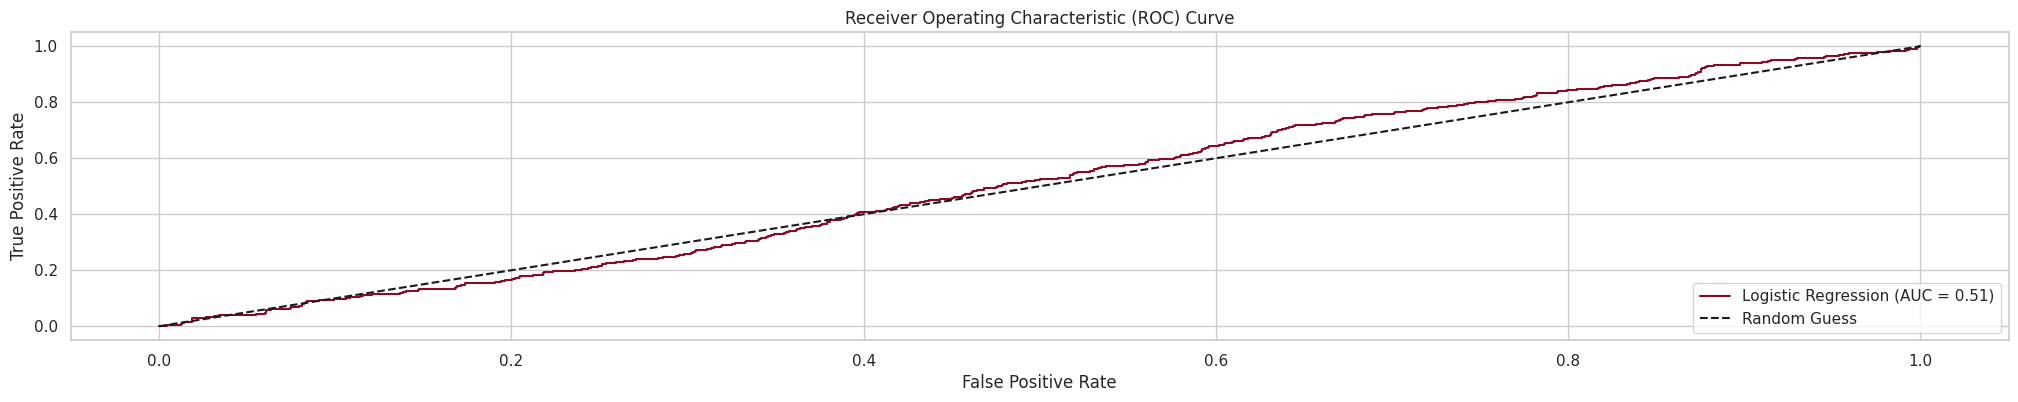

(0.5121967384838217,
 0.9602857142857143,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [413]:
Test_model(X_train, y_train)

## <a id='1.4'>[1.4] Correlation Matrix with Heatmap </a>

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

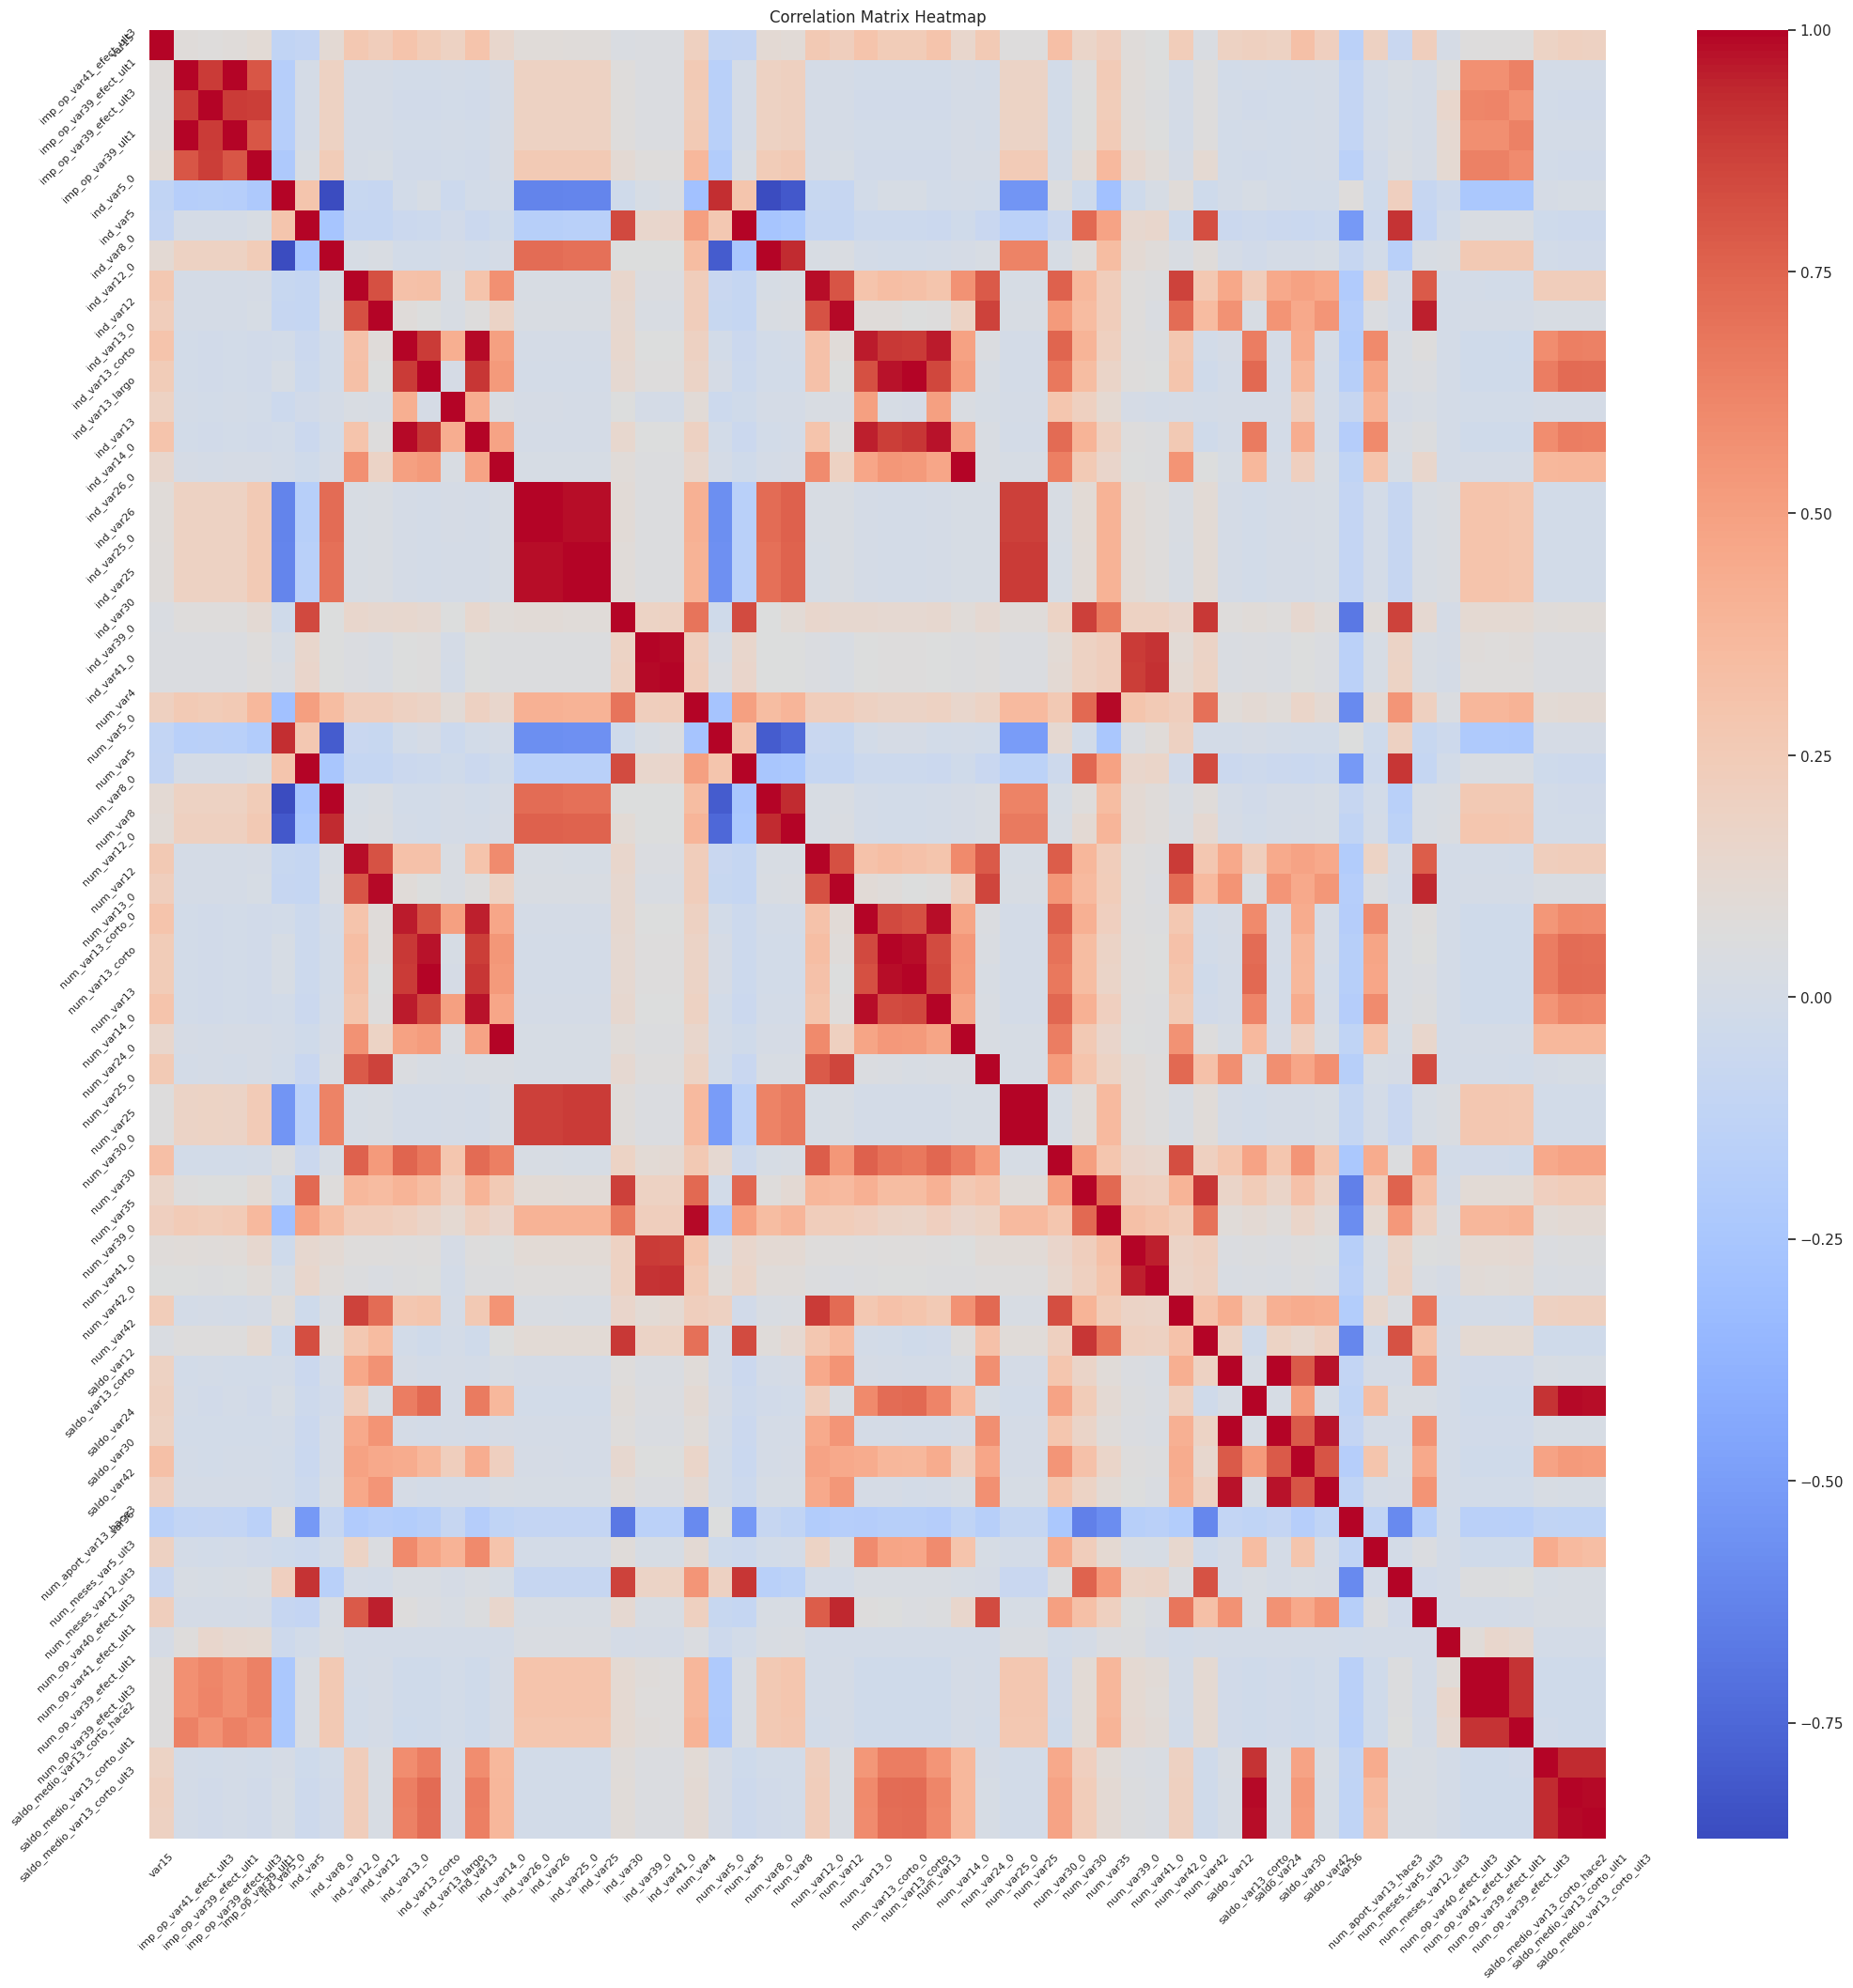

In [224]:
corr_matrix = trans_X_train.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=False)#, fmt=".2f", linewidths=0.2)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)
plt.title('Correlation Matrix Heatmap')

## <a id='1.5'>[1.5] Variance Inflation Factor (VIF)</a>

In [6]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [418]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [419]:
def remove_high_vif_features(X, threshold=5):
    vif_data = calculate_vif(X)
    high_vif_features = vif_data[vif_data["VIF"] > threshold]
    
    if len(high_vif_features) == 0:
        print("No features with VIF greater than the threshold.")
        return X
    else:
        print("Features with high VIF:", high_vif_features["Feature"].tolist())
        # Drop the features with high VIF
        X_filtered = X.drop(columns=high_vif_features["Feature"].tolist())
        print("Removed high VIF features. New shape:", X_filtered.shape)
        return X_filtered

In [421]:
%%time
threshold_vif = 10
X_train = remove_high_vif_features(X_train, threshold_vif)
X_train.shape

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with high VIF: ['var15', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_ct

(35000, 91)

In [7]:
cols = ['var15', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0', 'num_var13_largo', 'num_var13_medio_0', 'num_var13_medio', 'num_var13', 'num_var14_0', 'num_var14', 'num_var17_0', 'num_var17', 'num_var20_0', 'num_var20', 'num_var24_0', 'num_var24', 'num_var26_0', 'num_var26', 'num_var25_0', 'num_var25', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var40_ult3', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_hace3', 'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var29_0', 'num_var29', 'num_var30_0', 'num_var30', 'num_var31_0', 'num_var31', 'num_var32_0', 'num_var32', 'num_var33_0', 'num_var33', 'num_var35', 'num_var37_0', 'num_var37', 'num_var39_0', 'num_var40_0', 'num_var40', 'num_var41_0', 'num_var39', 'num_var42_0', 'num_var42', 'num_var44_0', 'num_var44', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13_medio', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var29', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var33', 'saldo_var40', 'saldo_var42', 'saldo_var44', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3', 'imp_aport_var13_hace3', 'imp_aport_var13_ult1', 'imp_aport_var17_hace3', 'imp_aport_var17_ult1', 'imp_aport_var33_hace3', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_compra_var44_ult1', 'imp_reemb_var33_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_ult1', 'imp_venta_var44_hace3', 'imp_venta_var44_ult1', 'ind_var7_emit_ult1', 'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 'num_aport_var13_ult1', 'num_aport_var17_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_compra_var44_ult1', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var39_vig_ult3', 'num_meses_var44_ult3', 'num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var40_comer_ult1', 'num_op_var40_comer_ult3', 'num_op_var40_efect_ult1', 'num_op_var40_efect_ult3', 'num_op_var41_comer_ult1', 'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1', 'num_op_var39_efect_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_ult1', 'num_reemb_var33_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var17_in_ult1', 'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_in_ult1', 'num_trasp_var33_out_ult1', 'num_venta_var44_hace3', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_hace2', 'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_hace3', 'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2', 'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3']
X_train = X_train.drop(columns = cols)

#### Create Model with VIF

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6048


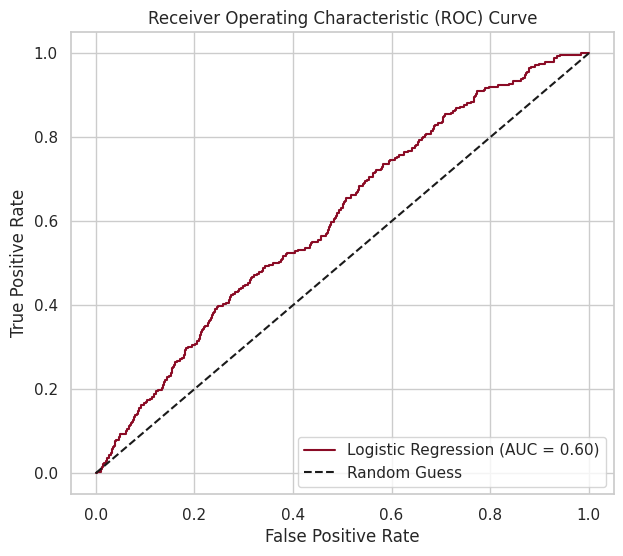

(0.6047507737802723,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [10]:
Test_model(X_train, y_train)

## <a id='1.6'>[1.5] Principal  Component Analysis (PCA)</a>

In [24]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)  # Use specified n_components
X_train = pca.fit_transform(X_train)

### Create Model with PCA Method

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9604

Confusion Matrix:
[[6723    1]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6201


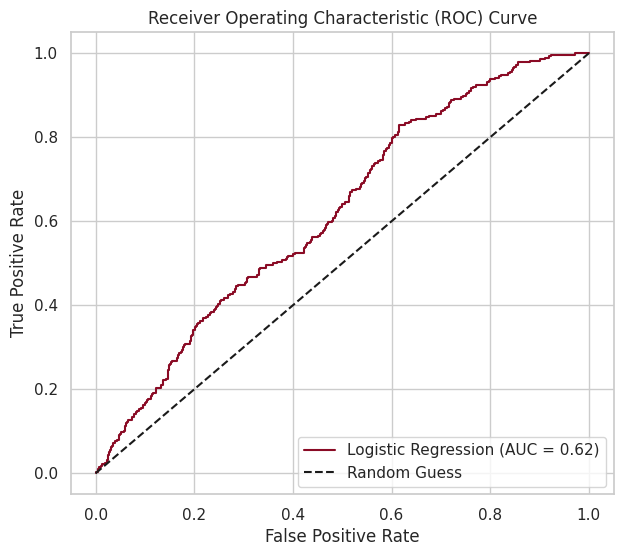

(0.6201347757114898,
 0.9604285714285714,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [26]:
Test_model(X_train, y_train)

---
<a id="1"><h1 style="text-align: center;">WRAPPER METHODS</h1></a> 

---
This approach tries to find the optimal set of features by iteratively adding or removing features and assessing the model's performance.
![Wrapper Methods]
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png" width = 500>

**Image source** : AnalyticsVidhya

#### **Key Considerations:**

* **pre-set evaluation criteria:** Choose a metric relevant to your task (e.g., roc_auc for classification , R-squared for regression).
* **Greedy Method:** This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations.
* **Overfitting:** Carefully validate the selected features to avoid overfitting the training data.


##### 2.1 [Forward Selection](#2.1)  
##### 1.2 [Univariate feature selection](#1.2) 
##### 1.3 [Correlation Matrix with Heatmap](#1.3) 
##### 1.4 [Variance Inflation Factor (VIF)](#1.4) 

## <a id="2.1">[2.1] Forward Selection</a>

Starts with an empty set of features and iteratively adds the feature that improves the model's performance the most until no further improvement is observed.

#### **Algorithm:**

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. 

In the second step, it evaluates all possible combinations of the selected best feature and a second one, and selects the pair (best one, another one) that produce the best performing.

1. Initialize the feature set with no features.
2. For each feature not in the set:
    * Add the feature to the set.
    * Train the model with the current feature set.
    * Evaluate the model's performance using a metric (e.g., auc, r-sqaure).
3. Select the feature that results in the best performance and add it to the final feature set.
4. Repeat steps 2-3 until no further improvement is observed.


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [28]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [29]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(X_train.select_dtypes(include=numerics).columns)
X_train[numerical_vars].shape

(35000, 370)

#### **Hard-coded method**

In [ ]:
%%time 
import warnings
from tqdm import tqdm
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings("ignore", category=ConvergenceWarning)

iterations = 30
scoring = 'roc_auc'
selected_features = []
remain_features = list(X_train.columns)
best_score = float('-inf')

results = []

for i in tqdm(range(iterations), desc="Feature Selection", leave=False):
    print(f"Iteration {i+1}:")
    print("-" * 50)

    best_feature = None
    best_iter_score = best_score

    for feature in remain_features:
        tmp_features = selected_features + [feature]
        model = LogisticRegression()
        scores = cross_val_score(
            model, X_train[tmp_features], y_train, cv=5, scoring=scoring
        )
        avg_score = scores.mean()
        print(f"  Feature: {feature:<20} Score: {avg_score:.4f}")
        results.append([i + 1, feature, avg_score])

        if avg_score > best_iter_score:
            best_feature = feature
            best_iter_score = avg_score

    if best_feature is not None:
        selected_features.append(best_feature)
        remain_features.remove(best_feature)
        best_score = best_iter_score
        print(f"> \033[1m\033[92mSelected Feature: {best_feature}, Score: {best_score:.4f}\033[0m\n")
    else:
        print(f"> \033[1m\033[91mNo further improvement found. Stopping.\n")
        break

print(f" \033[1m\033[93mFinal Selected Features: {selected_features}")

Feature Selection:   0%|          | 0/30 [00:00<?, ?it/s]

Iteration 1:
--------------------------------------------------
  Feature: ID                   Score: 0.5524
  Feature: var3                 Score: 0.4972
  Feature: var15                Score: 0.6956
  Feature: imp_ent_var16_ult1   Score: 0.4989
  Feature: imp_op_var39_comer_ult1 Score: 0.4955
  Feature: imp_op_var39_comer_ult3 Score: 0.4944
  Feature: imp_op_var40_comer_ult1 Score: 0.5011
  Feature: imp_op_var40_comer_ult3 Score: 0.4992
  Feature: imp_op_var40_efect_ult1 Score: 0.5020
  Feature: imp_op_var40_efect_ult3 Score: 0.5020
  Feature: imp_op_var40_ult1    Score: 0.5009
  Feature: imp_op_var41_comer_ult1 Score: 0.4960
  Feature: imp_op_var41_comer_ult3 Score: 0.4954
  Feature: imp_op_var41_efect_ult1 Score: 0.5139
  Feature: imp_op_var41_efect_ult3 Score: 0.5147
  Feature: imp_op_var41_ult1    Score: 0.5012
  Feature: imp_op_var39_efect_ult1 Score: 0.5142
  Feature: imp_op_var39_efect_ult3 Score: 0.5146
  Feature: imp_op_var39_ult1    Score: 0.5012
  Feature: imp_sal_var16_u

In [ ]:
import matplotlib.pyplot as plt


# Group data by column 1 and find the maximum of column 3 for each group
grouped_data = {}
for row in results:
    column1_value = row[0]
    if column1_value not in grouped_data:
        grouped_data[column1_value] = []
    grouped_data[column1_value].append(row[2])

x_values = sorted(grouped_data.keys())
y_values = [max(grouped_data[x]) for x in x_values]

# Create the line plot
plt.plot(x_values, y_values)
plt.xlabel("Column 1")
plt.ylabel("Max of Column 3")
plt.title("Line Plot of Column 1 vs Max of Column 3")
plt.show()

#### **Using `mlxtend`**

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector 

sfs = SequentialFeatureSelector(LogisticRegression(), 
           k_features=iterations, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring=scoring,
           cv=3)

sfs.fit(np.array(X_filtered), y_train)


[2024-06-04 06:17:28] Features: 1/10 -- score: 0.6803457420623418
[2024-06-04 06:17:29] Features: 2/10 -- score: 0.6838332255787054
[2024-06-04 06:17:31] Features: 3/10 -- score: 0.6856259724595056
[2024-06-04 06:17:36] Features: 4/10 -- score: 0.6870233027267919
[2024-06-04 06:17:42] Features: 5/10 -- score: 0.687599482917239
[2024-06-04 06:17:48] Features: 6/10 -- score: 0.688291883727064
[2024-06-04 06:17:55] Features: 7/10 -- score: 0.6892677584676502
[2024-06-04 06:18:03] Features: 8/10 -- score: 0.6890527392581719
[2024-06-04 06:18:10] Features: 9/10 -- score: 0.6845766674695014
[2024-06-04 06:18:17] Features: 10/10 -- score: 0.6888913388299797

SequentialFeatureSelector(cv=3, estimator=LogisticRegression(),
                          k_features=(10, 10), scoring='roc_auc', verbose=2)

In [59]:
sfs.k_feature_idx_

(4, 6, 8, 10, 11, 12, 17, 22, 24, 25)

### Create Model with Sequantial Forward Selection 

In [ ]:
Test_model(X_train[selected_features], y_train)

## <a id="2.1">[2.1] Backward Elimination</a>

It starts with a model that includes all features and then systematically removes features one by one, evaluating the model's performance after each removal. The goal is to find a subset of features that minimizes model complexity while maintaining or improving performance.

#### **Algorithm:**

1. Initialize the feature set with all features.
2. For each feature:
    - Temporarily remove a feature.
    - Train the model with the current feature set.
    - Evaluate the model's performance using a metric (e.g., auc, r-sqaure).
3. Remove the feature that results in the best performance and add it to the final feature set.
4. Repeat steps 2-3 until no further improvement is observed.

In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

#### **Hard-coded method**

In [232]:
%%time 

iterations = 60
scoring = 'roc_auc'
selected_features = list(trans_X_train.columns)  # Start with all features
remain_features = []
best_score = float('-inf')

results = []

for i in tqdm(range(iterations), desc="Feature Elimination", leave=False):
    print(f"Iteration {i+1}:")
    print("-" * 50)

    best_feature_to_remove = None
    best_iter_score = best_score

    for feature in selected_features:  # Loop through selected features
        tmp_features = selected_features.copy()
        tmp_features.remove(feature)  # Temporarily remove feature
        model = LogisticRegression()
        scores = cross_val_score(model, X_train[tmp_features],
                                 y_train, cv=5, scoring=scoring)
        avg_score = scores.mean()
        print(f"  Feature: {feature:<20} Score: {avg_score:.4f}")
        results.append([i + 1, feature, avg_score])

        if avg_score > best_iter_score:
            best_feature_to_remove = feature
            best_iter_score = avg_score

    if best_feature_to_remove is not None:
        selected_features.remove(best_feature_to_remove)
        remain_features.append(best_feature_to_remove)  # Move to remain_features
        best_score = best_iter_score
        print(f"> \033[1m\033[92mRemoved Feature: {best_feature_to_remove}, Score: {best_score:.4f}\033[0m\n")
    else:
        print(f"> \033[1m\033[91mNo further improvement found. Stopping.\n")
        break

print(f" \033[1m\033[93mFinal Selected Features: {selected_features}")

Feature Elimination:   0%|          | 0/60 [00:00<?, ?it/s]

Iteration 1:
--------------------------------------------------
  Feature: var15                Score: 0.4922
  Feature: imp_op_var41_efect_ult3 Score: 0.3544
  Feature: imp_op_var39_efect_ult1 Score: 0.3602
  Feature: imp_op_var39_efect_ult3 Score: 0.3603
  Feature: imp_op_var39_ult1    Score: 0.3588
  Feature: ind_var5_0           Score: 0.3622
  Feature: ind_var5             Score: 0.3585
  Feature: ind_var8_0           Score: 0.3632
  Feature: ind_var12_0          Score: 0.3583
  Feature: ind_var12            Score: 0.3624
  Feature: ind_var13_0          Score: 0.3656
  Feature: ind_var13_corto      Score: 0.3642
  Feature: ind_var13_largo      Score: 0.3618
  Feature: ind_var13            Score: 0.3600
  Feature: ind_var14_0          Score: 0.3550
  Feature: ind_var26_0          Score: 0.3642
  Feature: ind_var26            Score: 0.3642
  Feature: ind_var25_0          Score: 0.3658
  Feature: ind_var25            Score: 0.3658
  Feature: ind_var30            Score: 0.3578
  Featu

Feature Elimination:   2%|▏         | 1/60 [04:36<4:31:43, 276.34s/it]

  Feature: saldo_medio_var13_corto_ult3 Score: 0.3415
> Removed Feature: var15, Score: 0.4922

Iteration 2:
--------------------------------------------------
  Feature: imp_op_var41_efect_ult3 Score: 0.4949
  Feature: imp_op_var39_efect_ult1 Score: 0.4972
  Feature: imp_op_var39_efect_ult3 Score: 0.4943
  Feature: imp_op_var39_ult1    Score: 0.4824
  Feature: ind_var5_0           Score: 0.4906
  Feature: ind_var5             Score: 0.5031
  Feature: ind_var8_0           Score: 0.5041
  Feature: ind_var12_0          Score: 0.4943
  Feature: ind_var12            Score: 0.4924
  Feature: ind_var13_0          Score: 0.4949
  Feature: ind_var13_corto      Score: 0.4963
  Feature: ind_var13_largo      Score: 0.4915
  Feature: ind_var13            Score: 0.4981
  Feature: ind_var14_0          Score: 0.5089
  Feature: ind_var26_0          Score: 0.4946
  Feature: ind_var26            Score: 0.4946
  Feature: ind_var25_0          Score: 0.4974
  Feature: ind_var25            Score: 0.4974
  Fe

Feature Elimination:   3%|▎         | 2/60 [08:48<4:13:27, 262.19s/it]

  Feature: saldo_medio_var13_corto_ult3 Score: 0.4874
> Removed Feature: var36, Score: 0.6649

Iteration 3:
--------------------------------------------------
  Feature: imp_op_var41_efect_ult3 Score: 0.6734
  Feature: imp_op_var39_efect_ult1 Score: 0.6738
  Feature: imp_op_var39_efect_ult3 Score: 0.6652
  Feature: imp_op_var39_ult1    Score: 0.6743
  Feature: ind_var5_0           Score: 0.6666
  Feature: ind_var5             Score: 0.6645
  Feature: ind_var8_0           Score: 0.6681
  Feature: ind_var12_0          Score: 0.6718
  Feature: ind_var12            Score: 0.6724
  Feature: ind_var13_0          Score: 0.6787
  Feature: ind_var13_corto      Score: 0.6733
  Feature: ind_var13_largo      Score: 0.6664
  Feature: ind_var13            Score: 0.6723
  Feature: ind_var14_0          Score: 0.6602
  Feature: ind_var26_0          Score: 0.6707
  Feature: ind_var26            Score: 0.6707
  Feature: ind_var25_0          Score: 0.6741
  Feature: ind_var25            Score: 0.6741
  Fe

Feature Elimination:   5%|▌         | 3/60 [13:06<4:07:21, 260.37s/it]

  Feature: saldo_medio_var13_corto_ult3 Score: 0.6673
> Removed Feature: ind_var13_0, Score: 0.6787

Iteration 4:
--------------------------------------------------
  Feature: imp_op_var41_efect_ult3 Score: 0.6655
  Feature: imp_op_var39_efect_ult1 Score: 0.6710
  Feature: imp_op_var39_efect_ult3 Score: 0.6703
  Feature: imp_op_var39_ult1    Score: 0.6688
  Feature: ind_var5_0           Score: 0.6682
  Feature: ind_var5             Score: 0.6663
  Feature: ind_var8_0           Score: 0.6657
  Feature: ind_var12_0          Score: 0.6687
  Feature: ind_var12            Score: 0.6620
  Feature: ind_var13_corto      Score: 0.6727
  Feature: ind_var13_largo      Score: 0.6722
  Feature: ind_var13            Score: 0.6688
  Feature: ind_var14_0          Score: 0.6669
  Feature: ind_var26_0          Score: 0.6706
  Feature: ind_var26            Score: 0.6706
  Feature: ind_var25_0          Score: 0.6666
  Feature: ind_var25            Score: 0.6666
  Feature: ind_var30            Score: 0.665

  Feature: saldo_medio_var13_corto_ult3 Score: 0.6696
> No further improvement found. Stopping.

Final Selected Features: ['imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var26_0', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var14_0', 'num_var24_0', 'num_var25_0', 'num_var25', 'num_var30_0', 'num_var30', 'num_var35', 'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var12', 'saldo_var13_corto', 'saldo_var24', 'saldo_var30', 'saldo_var42', 'num_aport_var13_hace3', 'num_meses_var5_ult3', 'num_meses_var12_ult3', 'num_op_var40_efect_ult3', 'num_op_var41_efect_ult1', 'num_op_var39_efec

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results.index,
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

#### **Using `mlxtend`**

In [ ]:
sfs = SequentialFeatureSelector(LogisticRegression(), 
           k_features=iterations, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring=scoring,
           cv=3)

sfs.fit(np.array(trans_X_train), y_train)

### Create Model with Sequantial Backward Elimination 

In [ ]:
Test_model(X_train, y_train)

## **2.3 Exhaustive Feature Selection** <a class="anchor" id="2.3"></a>

- In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

  - all possible combinations of 1 feature  : 4C1 = 4 trails
  - all possible combinations of 2 features : 4C2 = 6 trails
  - all possible combinations of 3 features : 4C3 = 4 trails
  - all the 4 features : 4C4 = 1 trail
  
  
* **Computational Cost:**  This method is computationally expensive, especially as the number of features grows. It can become infeasible for large datasets.

**Code Example using mlxtend (Python):**

```python
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
model = LogisticRegression()

# Exhaustive feature selection with mlxtend
efs = EFS(
    model,
    scoring='roc_auc',
    min_features=1,  # Minimum number of features to consider
    max_features=3,  # Maximum number of features to consider
    cv=5,            # Number of cross-validation folds
    print_progress=True  # Print progress during the search
)

efs = efs.fit(X_train, y_train)
```

## **2.4 Recursive Feature elimination** <a class="anchor" id="2.4"></a>

Recursive Feature Elimination (RFE) is a feature selection technique used to identify the most relevant features in a dataset. It works by repeatedly constructing a model (usually a linear model like a logistic regression or a support vector machine) and eliminating features based on their importance scores.

#### **Algorithm:**

1. **Initial Model:** Train a model with all the features available.
2. **Feature Ranking:** Rank the features based on their importance scores.
3. **Feature Elimination:** Remove the least important features (often a predetermined number or a percentage) from the dataset.
4. **Model Retraining:** Re-train the model with the remaining features.
5. **Repeat:** Repeat steps 2-4 until the desired number of features is reached or until a certain performance threshold is met.


- Source : [scikit-learn](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py)

In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [236]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [237]:
selected_features = X_train.columns[rfe.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['var15', 'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult3',
       'ind_var5_0', 'ind_var5', 'ind_var30', 'ind_var39_0', 'ind_var41_0',
       'num_var4', 'num_var5_0', 'num_var5', 'num_var12_0', 'num_var12',
       'num_var13_0', 'num_var13', 'num_var30_0', 'num_var30', 'num_var35',
       'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42',
       'saldo_var13_corto', 'saldo_var30', 'saldo_var42', 'var36',
       'num_meses_var5_ult3', 'num_op_var41_efect_ult1',
       'num_op_var39_efect_ult1', 'num_op_var39_efect_ult3'],
      dtype='object')


In [246]:
rfe.n_features_

30

### Create Model with RFE Method 

In [ ]:
Test_model(X_train, y_train)

## **2.5 Recursive Feature Elimination with Cross-Validation** <a class="anchor" id="2.5"></a>

RFE-CV combines the RFE algorithm with cross-validation to improve its robustness and prevent overfitting.

**Algorithm:**

1. **Split dataset:** Divide the dataset into k folds (e.g., 5 folds for 5-fold cross-validation).
2. **RFE on each fold:** For each fold, perform RFE on the training data while treating the corresponding validation fold as the test set.
3. **Feature selection:** Select the features that are consistently ranked highly across all folds.
4. **Final model:** Train the final model using the selected features on the entire dataset.

In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

In [234]:
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring=scoring)

rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(), scoring='roc_auc')

In [235]:
selected_features = X_train.columns[rfecv.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['var15', 'ind_var5_0', 'ind_var5', 'ind_var30', 'ind_var39_0',
       'ind_var41_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var12_0',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42_0',
       'num_var42', 'num_meses_var5_ult3', 'num_op_var41_efect_ult1',
       'num_op_var39_efect_ult1'],
      dtype='object')


In [257]:
cv_results = pd.DataFrame(rfecv.cv_results_)
print('Max score: ',cv_results['mean_test_score'].max())
print('n_features: ',cv_results['mean_test_score'].idxmax())

Max score:  0.724958724534223
n_features:  18


In [248]:
rfecv.n_features_

19

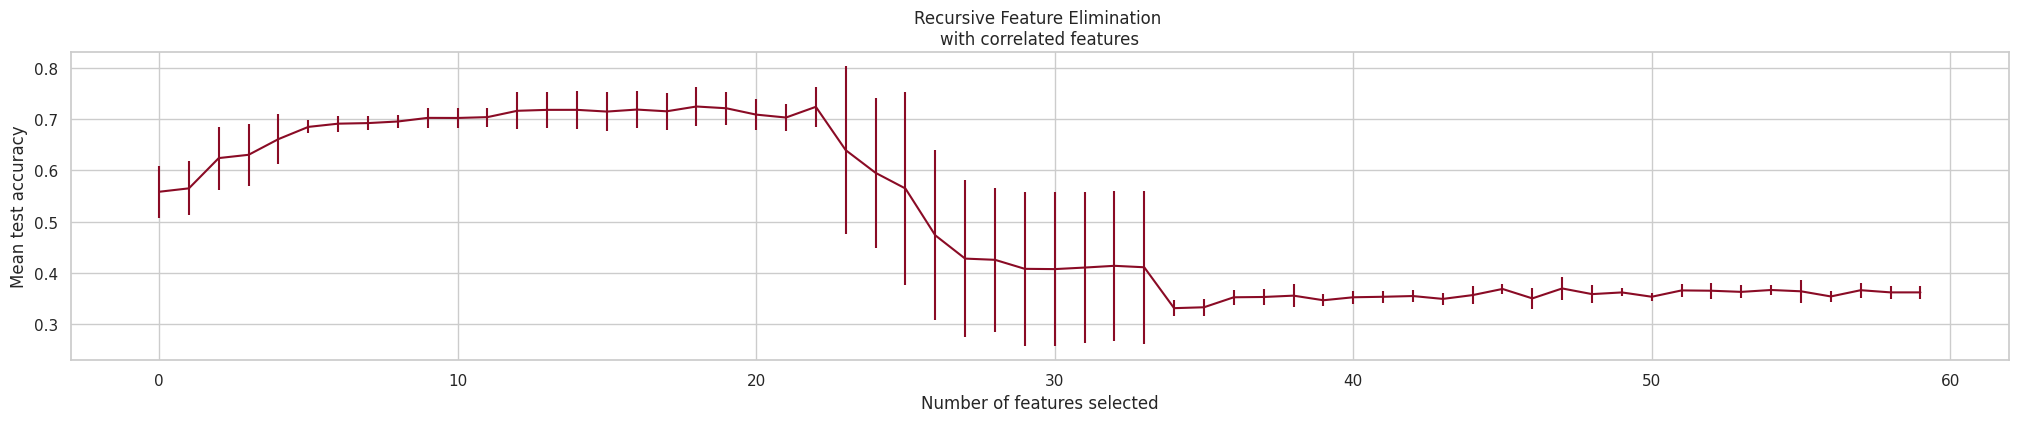

In [242]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results.index,
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

### Create Model with RFECV Method 

In [ ]:
Test_model(X_train, y_train)

# **3. Embedded Methods** <a class="anchor" id="3"></a>

## Embedded Feature Selection Methods

Embedded feature selection methods are a powerful approach to selecting relevant features **during the model training process**. They combine the feature selection step with the model building process, making them efficient and often leading to improved performance. 

**1. Regularization Techniques:**

* **Lasso (L1 Regularization):** This technique adds a penalty to the model's loss function based on the absolute values of the coefficients. This encourages sparsity, meaning some coefficients are driven to zero, effectively eliminating those features.
* **Ridge (L2 Regularization):** Adds a penalty based on the squared values of the coefficients. It shrinks the coefficients towards zero but rarely makes them exactly zero. This helps with preventing overfitting, but doesn't directly select features.
* **Elastic Net:** Combines L1 and L2 regularization, providing a balance between feature selection and preventing overfitting. It can handle highly correlated features and select groups of related variables.

**2. Decision Tree-based Methods:**

* **Decision Tree Feature Importance:** Decision trees inherently rank features based on their ability to split data effectively.  Features used at higher levels in the tree are considered more important.
* **Random Forest Feature Importance:** Random forests aggregate the importance scores from multiple decision trees to provide a more robust measure of feature relevance.

**4. Other Techniques:**

* **Neural Network Pruning:** Specific methods like weight decay and dropout can be used to prune less relevant features during neural network training.


**Here's a table summarizing embedded methods:**

| Method | Description | Advantages | Disadvantages |
|---|---|---|---|
| Lasso | L1 regularization, enforces sparsity | Efficient, interpretable | Limited to linear models |
| Ridge | L2 regularization, shrinks coefficients | Prevents overfitting | Does not select features |
| Elastic Net | Combines L1 and L2, selects groups of features | Handles correlated features | More complex than Lasso |
| Decision Tree Feature Importance | Measures feature importance based on splits | Intuitive, interpretable | Can be sensitive to data structure |
| Random Forest Feature Importance | Aggregates importance from multiple trees | Robust, less sensitive to noise | More computationally expensive |
| GBM Feature Importance | Measures feature contribution to model performance | Powerful, accurate | Can be complex to interpret |


- Embedded methods can be explained with the help of following graphic:

<img src ="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png" width = 500>


**Image source** : AnalyticsVidhya

## **3.1 LASSO** <a class="anchor" id="3.1"></a>



In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

### Create Model with LASSO

In [ ]:
Test_model(X_train, y_train)

## **3.2 Ridge** <a class="anchor" id="3.2"></a>



In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

### Create Model with Ridge

In [ ]:
Test_model(X_train, y_train)

## **3.3 ElasticNet** <a class="anchor" id="4.3"></a>



In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

### Create Model with ElasticNet

In [ ]:
Test_model(X_train, y_train)

## **3.4 RandomForest** <a class="anchor" id="4.4"></a>



In [417]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)

### Create Model with RandomForest 

In [ ]:
Test_model(X_train, y_train)

#### **Resources:** 
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection#4.-Embedded-Methods-

#### **Image Credits:** 
- https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149
- https://www.omnisci.com/technical-glossary/feature-selection